In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# from fastdtw import fastdtw
from scipy.stats import pearsonr
import pandas as pd
from dtaidistance import dtw

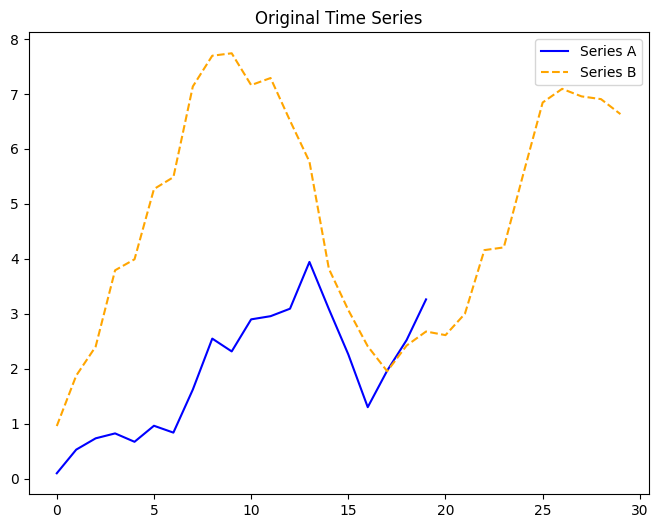

In [7]:
np.random.seed(0)
time_series_a = np.cumsum(np.random.rand(20) * 2 - 1)
time_series_b = np.cumsum(np.random.rand(30) * 2 - 1 + np.sin(np.linspace(0, 3 * np.pi, 30)))

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting the time series
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--', color='orange')

# Setting the title and legend
ax1.set_title('Original Time Series')
ax1.legend()

plt.show()

In [11]:
distance, paths = dtw.warping_paths(time_series_a, time_series_b, use_c=False)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)

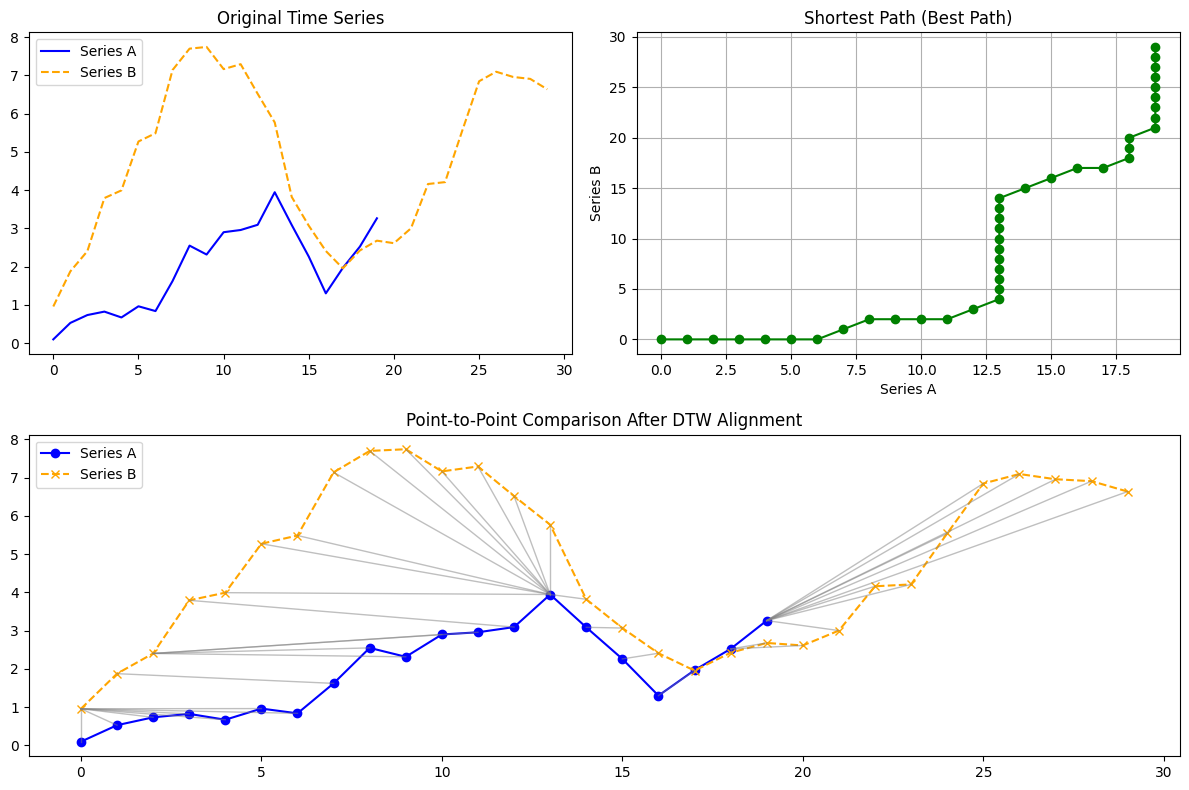

In [12]:
plt.figure(figsize=(12, 8))

# Original Time Series Plot
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--',color='orange')
ax1.set_title('Original Time Series')
ax1.legend()

# Shortest Path Plot (Cost Matrix with the path)
# In this example, only the path is plotted, not the entire cost matrix.

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(np.array(best_path)[:, 0], np.array(best_path)[:, 1], 'green', marker='o', linestyle='-')
ax2.set_title('Shortest Path (Best Path)')
ax2.set_xlabel('Series A')
ax2.set_ylabel('Series B')
ax2.grid(True)

# Point-to-Point Comparison Plot
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.plot(time_series_a, label='Series A', color='blue', marker='o')
ax3.plot(time_series_b, label='Series B', color='orange', marker='x', linestyle='--')
for a, b in best_path:
    ax3.plot([a, b], [time_series_a[a], time_series_b[b]], color='grey', linestyle='-', linewidth=1, alpha = 0.5)
ax3.set_title('Point-to-Point Comparison After DTW Alignment')
ax3.legend()

plt.tight_layout()
plt.show()

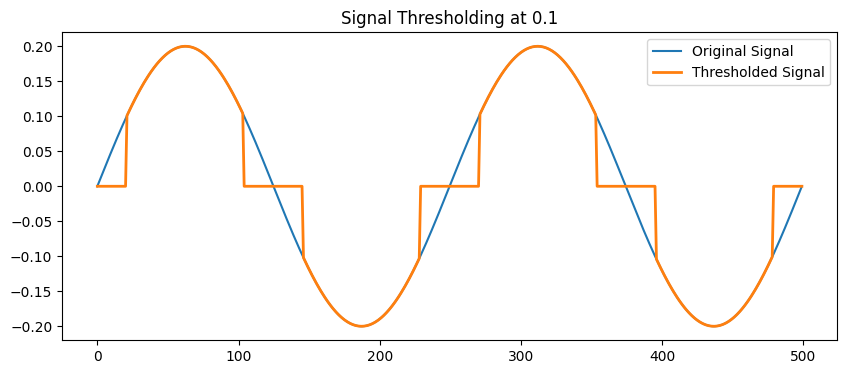

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Sample signal with small and large values
x = np.linspace(0, 4 * np.pi, 500)
signal = 0.2 * np.sin(x)

# Apply threshold
threshold = 0.1
filtered_signal = np.where(np.abs(signal) < threshold, 0, signal)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(signal, label="Original Signal")
plt.plot(filtered_signal, label="Thresholded Signal", linewidth=2)
# plt.axhline(threshold, color='gray', linestyle='--', linewidth=0.5)
# plt.axhline(-threshold, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title(f"Signal Thresholding at {threshold}")
plt.show()